[0 1 1]


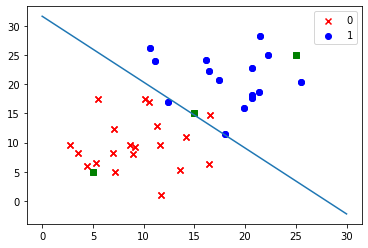

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### データ読み込み
import pandas as pd

df = pd.read_csv('data_for_logistic.csv')
data0 = df[df['t']==0]
data1 = df[df['t']==1]

plt.scatter(data0.x1, data0.x2, c='r', marker='x', label='0')
plt.scatter(data1.x1, data1.x2, c='b',marker='o', label='1')
plt.legend()

### ロジスティック回帰分離器の読み込み
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

### 学習
x_train = df[['x1', 'x2']].values
y_train = df['t'].values

lr.fit(x_train, y_train)

### 予測
new_point = np.array([[5, 5], [15, 15], [25, 25]]).astype(np.float32)
pred = lr.predict(new_point)
print(pred)

### 境界線を描画してみる。

### y = w0 + w1 * x1 + w2 * x2  のパラメータを取り出す。
w0 = lr.intercept_[0]
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]

### y = 0 とおいて直線の式を作る。
###   w0 + w1 * x1 + w2 * x2 = 0
###      =>  x2 = -(w0 + w1 * x1)/w2
x2 = lambda x1 : -1 * (w0 + w1 * x1) / w2

plt.scatter(data0.x1, data0.x2, c='r', marker='x')
plt.scatter(data1.x1, data1.x2, c='b',marker='o')
plt.scatter(new_point[:, 0], new_point[:, 1], c='g', marker='s')

line_x = np.linspace(0, 30, 10)
plt.plot(line_x, x2(line_x))